### Building A De-Bruijn Graph

### De-Bruijn Function

In [11]:
def de_bruijn_ize(st, k):              # st=String, k=k-mer number
    edges = []                         # list of edges
    nodes = set()                       # set of nodes (no duplicates)
    for i in range(len(st) - k + 1):   # loop through every k-mer in the string

    # tuple of k-1-mers (left[i:i+k-1], right[i+1:i+k])
        edges.append((st[i:i+k-1], st[i+1:i+k]))
        nodes.add(st[i:i+k-1])         # add 1st k-1-mer (left)
        nodes.add(st[i+1:i+k])         # add 2nd k-1-mer (Right)

    return nodes, edges


### Test De-Bruijn Function

In [12]:
nodes, edges = de_bruijn_ize('ACGCGTCG', 3)

### Print Nodes

In [13]:
print(nodes)

{'TC', 'AC', 'CG', 'GC', 'GT'}


### Print Edges

In [14]:
print(edges) # the edges displayed below in that order is the Eulerian Walk

[('AC', 'CG'), ('CG', 'GC'), ('GC', 'CG'), ('CG', 'GT'), ('GT', 'TC'), ('TC', 'CG')]


### Install gvmagic

In [28]:
pip install gvmagic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for gvmagic: filename=gvmagic-0.5-py3-none-any.whl size=10470 sha256=23374a42e2ce5c09c774f8459f8e527d6626bee3243aea843926a2bdcd13a2f7
  Stored in directory: /root/.cache/pip/wheels/e5/ad/b2/2ba1aaaf5b2004d96473291c80f98d4524a01c6d6e9d468172
Successfully built gvmagic


### Load 'gvmagic' (IPython plug-in that draws graphs)

In [29]:
%load_ext gvmagic


### Function to visualize the De-Bruijn Graph

In [30]:
def visualize_de_bruijn(st, k):
    """ Visualize a directed multigraph using graphviz"""
    nodes, edges = de_bruijn_ize(st, k)
    dot_str = 'digraph "DeBruijn graph" {\n'
    for node in nodes:
        dot_str += '  %s [label="%s"]  ;\n' % (node, node)
    for src, dst in edges:
        dot_str += '  %s -> %s ;\n'  % (src, dst)
    return dot_str + '}\n'

### Plot De-Bruijn Graph

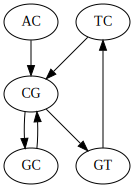

In [32]:
%dotstr visualize_de_bruijn('ACGCGTCG', 3) # Eulerian Walk
                                           #1 start with AC -> CG (1st k-mer)
                                           #2 start with CG -> GC (2nd kmer)
                                           #3 back to CG
                                           #4 then to GT
                                           #5 then to TC
                                           #6 then to CG then done.